<a href="https://colab.research.google.com/github/ngcheeyuan/Tensorflow-Certification-Practice/blob/main/horses_or_human.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow_datasets as tfds

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as layers
from tensorflow.keras.utils import plot_model
import tensorflow_hub as hub

In [3]:
ds , ds_info = tfds.load(name = 'horses_or_humans',
                         with_info = True,
                         as_supervised = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteY5U7EN/horses_or_humans-train.tfrecord


  0%|          | 0/1027 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteY5U7EN/horses_or_humans-test.tfrecord


  0%|          | 0/256 [00:00<?, ? examples/s]

Dataset horses_or_humans downloaded and prepared to /root/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.


In [4]:
ds_info

tfds.core.DatasetInfo(
    name='horses_or_humans',
    version=3.0.0,
    description='A large set of images of horses and humans.',
    homepage='http://laurencemoroney.com/horses-or-humans-dataset',
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=1283,
    splits={
        'test': 256,
        'train': 1027,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {horses_or_humans,
    author = "Laurence Moroney",
    title = "Horses or Humans Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/horses-or-humans-dataset"
    }""",
    redistribution_info=,
)

In [5]:
len(ds['train'])

1027

In [105]:
train_data = ds['train'].batch(1)
test_data = ds['test'].batch(1)

In [106]:
train_data , test_data

(<BatchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <BatchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

In [107]:
class_dict ={1:'human',0:'horse'}

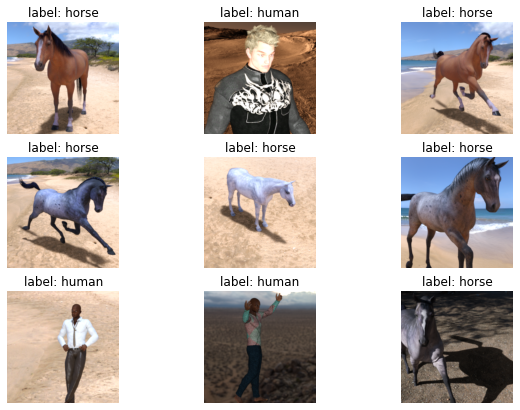

In [111]:
import random 
random_index = random.randint(0,len(ds['train'])-9) 
sample = ds['train'].skip(random_index).take(9)

plt.figure(figsize = (10,7))
for index,(image,label) in enumerate(sample,1):
  plt.subplot(3,3,index)
  plt.imshow(image)
  plt.title(f'label: {class_dict[label.numpy()]}')
  plt.axis(False)

In [112]:
FILTERS = 10
KERNEL_SIZE = (3,3)

model = tf.keras.Sequential([
                             layers.Rescaling(scale = 1/255.),
                             layers.Conv2D(filters =  FILTERS,
                                           kernel_size = KERNEL_SIZE,
                                           padding = 'same',
                                           activation = 'relu'
                                           ),
                             layers.Conv2D(filters = FILTERS,
                                           kernel_size = KERNEL_SIZE,
                                           padding = 'same',
                                           activation = 'relu'
                                           ),
                             layers.MaxPool2D(),
                             layers.Conv2D(filters =  FILTERS,
                                           kernel_size = KERNEL_SIZE,
                                           padding = 'same',
                                           activation = 'relu'
                                           ),
                             layers.Conv2D(filters = FILTERS,
                                           kernel_size = KERNEL_SIZE,
                                           padding = 'same',
                                           activation = 'relu'
                                           ),
                             layers.MaxPool2D(),                             
                             layers.Normalization(),
                             layers.Flatten(),
                             layers.Dense(1,activation = 'sigmoid')
])

In [113]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy'])

In [114]:
FILEPATH_BASE = 'model_checkpoint'
FILEPATH = FILEPATH_BASE + '/base_model'
history_0 = model.fit(train_data,
                      epochs = 5,
                      validation_data = test_data,
                      callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath = FILEPATH,
                                                                      monitor = 'val_accuracy',
                                                                      save_best_only = True)])

Epoch 1/5
1024/1027 [============================>.] - ETA: 0s - loss: 0.3893 - accuracy: 0.8594INFO:tensorflow:Assets written to: model_checkpoint/base_model/assets


INFO:tensorflow:Assets written to: model_checkpoint/base_model/assets


1027/1027 [==============================] - 17s 15ms/step - loss: 0.3883 - accuracy: 0.8598 - val_loss: 1.2612 - val_accuracy: 0.8164
Epoch 2/5
1023/1027 [============================>.] - ETA: 0s - loss: 0.0966 - accuracy: 0.9717INFO:tensorflow:Assets written to: model_checkpoint/base_model/assets


INFO:tensorflow:Assets written to: model_checkpoint/base_model/assets


1027/1027 [==============================] - 17s 17ms/step - loss: 0.0964 - accuracy: 0.9718 - val_loss: 1.9087 - val_accuracy: 0.8242
Epoch 3/5
1027/1027 [==============================] - 16s 16ms/step - loss: 0.0384 - accuracy: 0.9844 - val_loss: 3.1531 - val_accuracy: 0.8203
Epoch 4/5
1027/1027 [==============================] - 15s 14ms/step - loss: 0.0215 - accuracy: 0.9961 - val_loss: 5.3859 - val_accuracy: 0.8203
Epoch 5/5
1027/1027 [==============================] - 16s 15ms/step - loss: 0.1006 - accuracy: 0.9698 - val_loss: 2.5005 - val_accuracy: 0.8008


In [115]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_9 (Rescaling)     (None, 300, 300, 3)       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 300, 300, 10)      280       
                                                                 
 conv2d_29 (Conv2D)          (None, 300, 300, 10)      910       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 150, 150, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 150, 150, 10)      910       
                                                                 
 conv2d_31 (Conv2D)          (None, 150, 150, 10)      910       
                                                     

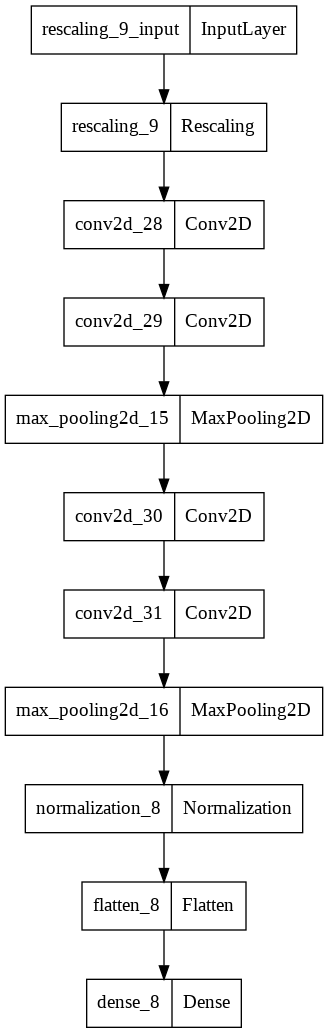

In [116]:
plot_model(model)

In [117]:
def plot_loss_curve(history):
  df = pd.DataFrame(history.history)
  df['epoch'] = range(0,len(df))

  plt.figure(figsize=(10,7))
  plt.subplot(1,2,1)
  plt.plot(df['epoch'] , df['accuracy'] , label = 'accuracy')
  plt.plot(df['epoch'] , df['val_accuracy'] , label = 'val_accuracy')
  plt.xlabel('epochs')
  plt.ylabel('accuracy_score')
  plt.legend(loc = 'upper left')
  plt.subplot(1,2,2)
  plt.plot(df['epoch'] , df['loss'] , label = 'loss')
  plt.plot(df['epoch'] , df['val_loss'] , label = 'val_loss')
  plt.xlabel('epochs')
  plt.ylabel('losss')
  plt.legend(loc = 'upper left')


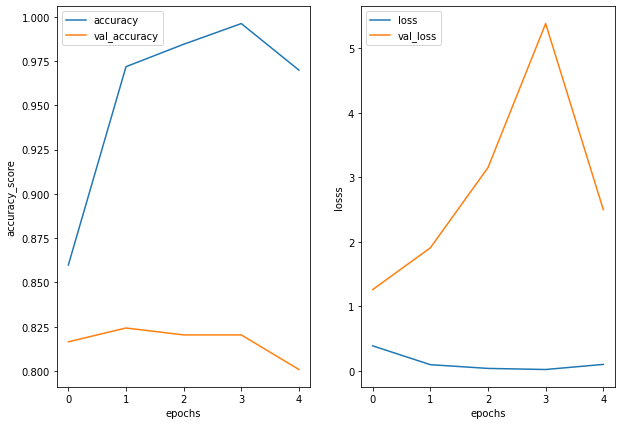

In [118]:
plot_loss_curve(history_0)

In [119]:
IMAGE_SHAPE = (300,300)
# let's make a create_model() function to create a model from a URL

def create_model(model_url,num_classes=2):
  '''
  Take a Tensorflow Hub URL and creates a Keras Sequential model with it

  Args:
  model_url (str): A TensorFlow Hub feature extraction URL.
  num_classes (int): Number of output neurons in the output layer,
  should be equal to the number of target classes, default = 10

  Returns:
  An uncompiled Keras Sequential model with model_url as feature extractor
  layer and Dense output layer with num_classes output neurons
  '''

  #Download the pretrained model and save it as a Keras layer

  feature_extractor_layer = hub.KerasLayer(model_url, 
                                           trainable = False,
                                           name = 'feature_extraction_layer',
                                           input_shape = IMAGE_SHAPE + (3,))# freeze the already learned patterns
  # Create our own model

  if(num_classes > 1):
    model = tf.keras.Sequential([layers.Rescaling(scale = 1/255.),
                                 feature_extractor_layer,
                                 layers.Dense(num_classes, activation = 'softmax', name ='output_layer')


    ])
  else:
    model = tf.keras.Sequential([layers.Rescaling(scale = 1/255.),
                                 feature_extractor_layer,
                                 layers.Dense(1, activation = 'sigmoid', name ='output_layer')
    ])


  return model

In [120]:
model_url = 'https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/classification/2'
model_2 = create_model(model_url,num_classes = 1)

In [121]:
model_2.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics = ['accuracy'])

In [122]:
FILEPATH = FILEPATH_BASE + '/efficient_net_v2'
history_2 = model_2.fit(train_data,
                        epochs = 5,
                        validation_data = test_data,
                        callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath = FILEPATH,
                                                                        monitor = 'val_accuracy',
                                                                        save_best_only = True)])

Epoch 1/5
1027/1027 [==============================] - ETA: 0s - loss: 0.0206 - accuracy: 0.9912

INFO:tensorflow:Assets written to: model_checkpoint/efficient_net_v2/assets


INFO:tensorflow:Assets written to: model_checkpoint/efficient_net_v2/assets


1027/1027 [==============================] - 102s 84ms/step - loss: 0.0206 - accuracy: 0.9912 - val_loss: 0.0347 - val_accuracy: 0.9844
Epoch 2/5
1027/1027 [==============================] - 67s 66ms/step - loss: 5.2256e-04 - accuracy: 1.0000 - val_loss: 0.0338 - val_accuracy: 0.9844
Epoch 3/5
1027/1027 [==============================] - 68s 66ms/step - loss: 2.0499e-04 - accuracy: 1.0000 - val_loss: 0.0300 - val_accuracy: 0.9844
Epoch 4/5
1026/1027 [============================>.] - ETA: 0s - loss: 1.0343e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: model_checkpoint/efficient_net_v2/assets


INFO:tensorflow:Assets written to: model_checkpoint/efficient_net_v2/assets


1027/1027 [==============================] - 95s 92ms/step - loss: 1.0334e-04 - accuracy: 1.0000 - val_loss: 0.0263 - val_accuracy: 0.9883
Epoch 5/5
1026/1027 [============================>.] - ETA: 0s - loss: 5.6942e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: model_checkpoint/efficient_net_v2/assets


INFO:tensorflow:Assets written to: model_checkpoint/efficient_net_v2/assets


1027/1027 [==============================] - 87s 85ms/step - loss: 5.6888e-05 - accuracy: 1.0000 - val_loss: 0.0231 - val_accuracy: 0.9922


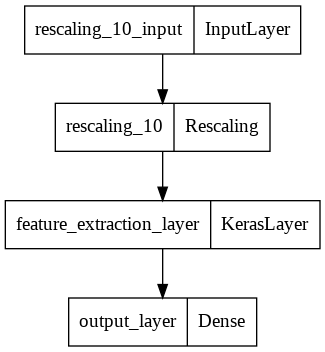

In [128]:
plot_model(model_2)

In [129]:
model_2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_10 (Rescaling)    (None, 300, 300, 3)       0         
                                                                 
 feature_extraction_layer (K  (None, 1000)             21612360  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 1)                 1001      
                                                                 
Total params: 21,613,361
Trainable params: 1,001
Non-trainable params: 21,612,360
_________________________________________________________________


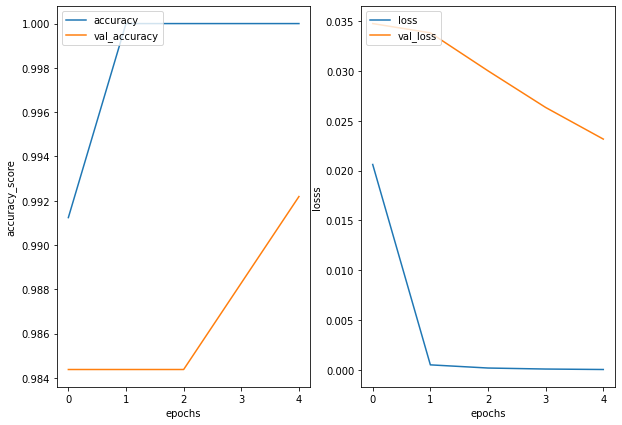

In [130]:
plot_loss_curve(history_2)

In [131]:
model_prediction = model_2.predict(test_data)

In [135]:
import itertools
merged = list(itertools.chain(*model_prediction))

In [143]:
predictions = [(1 if x >=0.5 else 0)  for x in merged]

In [154]:
label_list = []
image_list = []
for (image,label) in ds['test']:
  label_list.append(label.numpy())
  image_list.append(image.numpy())

In [159]:
model_df = pd.DataFrame({'true_label':label_list,
                         'predicted_label':predictions,
                         'prediction_probs':merged,
                         'image':image_list})

In [160]:
model_df['error'] = model_df['true_label'] != model_df['predicted_label']

In [161]:
mask = model_df['error'] == True

In [163]:
errors = model_df[mask]

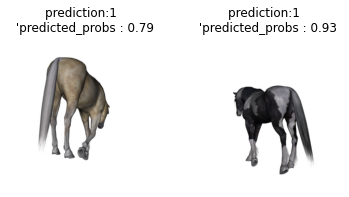

In [180]:
for index,row in enumerate(errors.itertuples(),1):
  plt.subplot(1,2,index)
  plt.imshow(getattr(row, 'image'))
  plt.title(f"prediction:{getattr(row, 'predicted_label')} \n 'predicted_probs : {round(getattr(row,'prediction_probs'),2)}")
  plt.axis(False)